10장을 끝내고 왔다. <br>
10장을 공부해보니, 딥러닝이 머신러닝보다 오히려 더 간결한 알고리즘을 수행하는 것 같다.<br>
활성화함수만 잘 선택한다면 회귀, 분류 문제를 해결할 수 있기 때문에 이렇게 생각했다. 

딥러닝은 재미있는 것 같다. 아직 머신러닝의 지식이 부족하기 때문에 base가 없는 상태에서 너무 막 공부를 하는게 아닌가 싶기도 하지만... 그래도 재밌으면 그만인 것 같다. 

11장도 열심히 공부하겠다.

-----------
11장 초반부의 주요내용은 그래디언트 소실/ 그래디언트 폭주와 관련된 문제와 문제에 대한 해결법(다양한 가중치 초기화 방법을 통한,다양한 활성화 함수를 통한)이 제시되어있다.

그래디언트 소실/폭주 문제는 신경망의 깊이가 아주 깊은 (내가 하고 싶은 말은 10장에서 사용된 은닉층이 해봐야 두겹인 신경망이 아닌) 신경망에서 발생하는 문제라고한다. 아직은 이런 문제를 겪어보지 못해서 뭔가 와닿지는 않는다.

### 가중치 초기화를 통한 그래티언트 소실문제 해결

- 글로럿 초기화: 활성화함수 없음, tanh, logistic, softmax - σ^2 = 1/fan_avg
- He 초기화: ReLU 함수와 그 변종들(Leaky ReLU) - σ^2 = 2/fan_in
- 르쿤 : SELU  - σ^2 = 1/fan_in

위 식들은 균등분포 혹은 정규분포로 이루어져있다. <br>
이때 중요한 값은, fan_in/ fan_out이다. 이 값들은 각각 층의 입력과 출력연결 개수를 나타낸다.

디폴트는 균등분포의 글로럿초기화를 사용한다. r= sqrt(3/fan_avg) 일 때, -r ~ +r

> keras.layers.Dense(10, activation="relu", kernel_initializer="he_nomal")

> keras.layers.Dense(10, activation="relu", kernel_initializer="lecun_nomal")

### 활성화 함수를 통한 그래디언트 문제 해결

주요 활성화 함수:
1. LeakyReLU: ReLU와 비슷하지만, 죽은 ReLU문제가 일어나지 않는 장점이 있다.
2. RReLU: LeakyReLU alpha값을 무작위로 설정하는 활성화 함수이다. 이 함수는 규제의 역할도 수행한다. 
3. PReLU: 역전파가 실행될 때 마다 alpha값이 훈련되서 수정되는 함수이다. 소규모 데이터셋에서는 과대적합의 위험성이 있다.
4. ELU: z<0 일때 지수함수로 이루어진 함수이다. 수렴속도가 빠르고 정확하지만, 계산이 느리다.
5. SELU: 자기정규화가 가능하다면 가장 성능이 좋은 함수이다. lecun_normal을 사용해야한다.

SELU > ELU > LeakyReLU > ReLU > tanh > logistic 순으로 사용하면 된다.
하지만 나는 속도가 중요하기 때문에 ReLU를 사용할 것이다.

LeakyReLU 활성화 함수를 사용하려면 LeakyReLU층을 만들고 모델에서 적용하려는 층 뒤에 추가하면 된다.
> model.keras.models.Sequential(\[<br>
&nbsp; &nbsp; &nbsp; &nbsp; [...]<br>
&nbsp; &nbsp; &nbsp; &nbsp; keras.layers.Dense(10, kernel_initializer="he_normal"),<br>
&nbsp; &nbsp; &nbsp; &nbsp; keras.layers.LeakyReLU(alpha=0.2),<br>
&nbsp; &nbsp; &nbsp; &nbsp; [...]<br>
\])

PReLU는 keras.layers.LeakyReLU(alpha=0.2) 대신 keras.layers.PReLU(alpha=0.2)를 사용하면 된다.

----------
SELU 활성화 함수를 사용하려면
> layer = keras.layers.Dense(10, activation="selu", kernel_optimizer="lecun_normal")

처럼 작성하면 된다.

### 배치 정규화 
이 기법은 각 층에서 활성화 함수를 통과하기 전이나 후에 모델에 연산을 하나 추가하는 것이다. 이 연산은 단순하게 입력을 원점에 맞추고 정규화한다음, 각 층에서 두개의 새로운 파라미터로 결괏값의 스케일을 조정하고 이동시킨다. 하나는 스케일 조정에, 다른 하나는 이동에 사용한다. 많은 경우 신경망의 첫 번째 층으로 배치 정규화를 추가하면 훈련 세트를 표준화할 필요가 없다.

라고 한다...


나는 잘 이해를 못해서 아래 링크를 통해서 이해해봤다<br>
https://sacko.tistory.com/44

<b>내가 생각하기에 배치 정규화는 매번 배치가 학습될 때마다, 배치의 평균과 분산을 추정해서(지수이동평균을 이용한다.)(이 때 추정된 평균과 추정된 분산 변수가 생긴다.), 매 은닉층에 들어가기전에 정규화된 상태(이 때 감마와 베타가 이용된다.) 로 들어가게하는 것이다.</b>
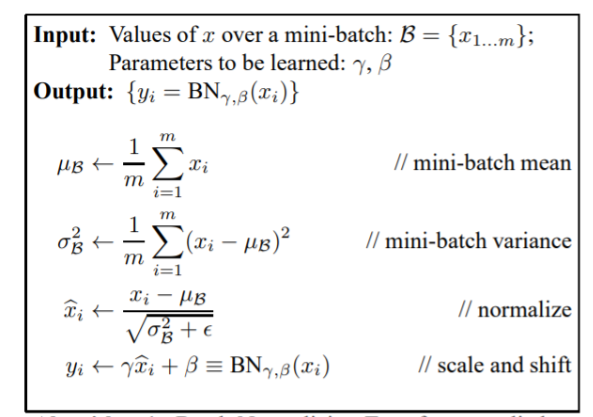
~~다른건 알겠는데 스케일 조정과, 이동에 사용되는 파라미터는 뭔지 잘 모르겠다. ~~
<br> 파라미터 두개는 각각 정규화를 위해서 각 뉴런마다 적용되는 파라미터라고 생각하면 될 듯 하다. (역전파를 통해 학습됨)


## 케라스로 배치 정규화 구현하기
배치정규화는 아래와 같이 사용할 수 있다.

활성화 함수의 앞이나 뒤에 배치정규화 층을 넣어주면 된다.

In [13]:
from tensorflow import keras

model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_9 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_10 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_11 (Bat  (None, 100)             

In [15]:
[(var.name, var.trainable) for var in model_1.layers[1].variables]

[('batch_normalization_9/gamma:0', True),
 ('batch_normalization_9/beta:0', True),
 ('batch_normalization_9/moving_mean:0', False),
 ('batch_normalization_9/moving_variance:0', False)]

감마와 베타는 역전파를 수행할 때 학습이 되는 변수이고, 추정된 평균과 분산을 담당하는 변수는 역전파에서 학습되는 변수가 아니다.

In [18]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

배치정규화는 이동파라미터가 있기 때문에 편향을 사용하지 않을 수 있다. <br>
편향을 배제하는게 어떤 효과로 나타는지 모르겠지만, 말 그대로 학습에서의 편향을 배제해주는 것 아닐까?

----
BatchNormalization은 조정할 하이퍼파라미터가 적다. 

그래도 이따금 momentum 매개변수를 변경해야할 필요가 있다. 이는 Batchnormalization에서 지수 이동 평균을 업데이트할 때 사용된다. 새로운 v값(즉, 현재 배치에서 계산한 새로운 입력 평균 벡터나 표준편차벡터)가 주어지면 다음 식을 이용해서 이동 평균 v^을 업데이트 한다. 

> v^ = v^ x momentum + v x (1 - momentum)

적절한 momentum 값은 일반적으로 1에 가깝다. 예를 들면 0.9, 0.99, 0.99이다. 

-----
다른 중요한 하이퍼파라미터는 axis 이다. 이 매개 변수는 정규화할 축을 경정한다. 기본값은 -1이다. 즉 마